# Import Data From dataset



## Configuring the package import

In [1]:
import sys
sys.path.append("..")  # Add parent directory to path


In [2]:

from datasets import load_dataset, validate_dataset  # Now you can import the package


ds = load_dataset("./../data/categorized_v4_numeric.csv")
ds = validate_dataset(ds)

ds.head()


,Q1A,Q1E,Q2A,Q2E,Q3A,Q3E,Q4A,Q4E,Q5A,Q5E,...,gender,age,religion,married,familysize,major_category,depression_score,anxiety_score,stress_score,das_score
0,4,3890,4,2122,2,1944,4,2044,4,2153,...,2,16,12,1,2,0,41,48,54,86
1,4,8118,1,2890,2,4777,3,3090,4,5078,...,2,16,7,1,4,0,38,31,41,66
2,3,5784,1,4373,4,3242,1,6470,4,3927,...,2,17,4,1,3,0,53,26,31,66
3,2,5081,3,6837,2,5521,1,4556,3,3269,...,2,13,4,1,5,6,30,31,30,55
4,2,3215,2,7731,3,4156,4,2802,4,5628,...,2,19,10,1,4,8,46,54,43,86


## Removing unnecessary columns

In [3]:
ds = ds.drop(columns=["country"])

# Drop rows with missing values
df = ds.dropna()

ds.head()

,Q1A,Q1E,Q2A,Q2E,Q3A,Q3E,Q4A,Q4E,Q5A,Q5E,...,gender,age,religion,married,familysize,major_category,depression_score,anxiety_score,stress_score,das_score
0,4,3890,4,2122,2,1944,4,2044,4,2153,...,2,16,12,1,2,0,41,48,54,86
1,4,8118,1,2890,2,4777,3,3090,4,5078,...,2,16,7,1,4,0,38,31,41,66
2,3,5784,1,4373,4,3242,1,6470,4,3927,...,2,17,4,1,3,0,53,26,31,66
3,2,5081,3,6837,2,5521,1,4556,3,3269,...,2,13,4,1,5,6,30,31,30,55
4,2,3215,2,7731,3,4156,4,2802,4,5628,...,2,19,10,1,4,8,46,54,43,86



### Splitting the dataset

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR as SVR
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd


# Define targets
target_columns = ["depression_score", "anxiety_score", "stress_score", "das_score"]

sc = StandardScaler()
# Separate features and targets
X = sc.fit_transform(df.drop(columns=target_columns))
y = df[target_columns]

# Option 1: Keep only numeric features
# X = X.select_dtypes(include=["number"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Convert X to a pandas DataFrame
X = pd.DataFrame(X, columns=df.drop(columns=target_columns).columns)

# Display the first 5 rows of X_test
X.head()
# print(y[:5])  # Uncomment this line if you want to display the first 5 rows of y

,Q1A,Q1E,Q2A,Q2E,Q3A,Q3E,Q4A,Q4E,Q5A,Q5E,...,TIPI9,TIPI10,education,urban,gender,age,religion,married,familysize,major_category
0,1.337573,-0.035530,1.644310,-0.121086,-0.217712,-0.034546,1.966821,-0.066918,1.381951,-0.058591,...,-1.447435,-1.465140,-0.569045,0.968916,0.47382,-0.352718,1.250341,-0.357829,-0.705242,-1.046772
1,1.337573,0.013234,-1.054627,-0.092119,-0.217712,-0.016695,1.007317,-0.053152,1.381951,-0.013088,...,-1.447435,0.680751,-0.569045,0.968916,0.47382,-0.352718,-0.156386,-0.357829,0.228686,-1.046772
2,0.368679,-0.013686,-1.054627,-0.036185,1.708118,-0.026367,-0.911692,-0.008669,1.381951,-0.030994,...,-0.354826,-0.928668,-0.569045,0.968916,0.47382,-0.306382,-1.000422,-0.357829,-0.238278,-1.046772
3,-0.600215,-0.021794,0.744665,0.056750,-0.217712,-0.012007,-0.911692,-0.033859,0.447279,-0.041230,...,1.284086,-1.465140,-1.698474,0.968916,0.47382,-0.491726,-1.000422,-0.357829,0.695651,1.036298
4,-0.600215,-0.043315,-0.154981,0.090469,0.745203,-0.020608,1.966821,-0.056943,1.381951,-0.004532,...,-0.354826,-0.392195,0.560384,-0.273704,0.47382,-0.213710,0.687650,-0.357829,0.228686,1.730655


### Training the model

In [5]:
# Train the model using MultiOutputRegressor to handle multiple target columns
model = MultiOutputRegressor(SVR(max_iter=5000))
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
target_names = ["depression_score", "anxiety_score", "stress_score", "das_score"]





f:\research\DAS-AI\svm\.venv\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [6]:
# # Create a single DataFrame for all target columns
# comparison = pd.DataFrame()

# for target in target_columns:
#     comparison[f"{target[:3]}"] = y_test[target].values
#     comparison[f"{target[:3]}_Pre"] = y_pred[:, target_columns.index(target)]

# # Display the first few rows of the combined comparison DataFrame
# comparison.head()


### Evaluating the model

In [7]:
for i, target in enumerate(target_names):
    print(f"\nResults for {target}:")
    print(
        f"Mean Absolute Error: {mean_absolute_error(y_test.iloc[:, i], y_pred[:, i])}"
    )
    print(f"R² Score: {r2_score(y_test.iloc[:, i], y_pred[:, i])}")



Results for depression_score:
Mean Absolute Error: 2.8933316970031687e-08
R² Score: 0.9999999999999958

Results for anxiety_score:
Mean Absolute Error: 3.0550375674863193e-08
R² Score: 0.9999999999999772

Results for stress_score:
Mean Absolute Error: 1.7225278866182502e-08
R² Score: 0.9999999999999911

Results for das_score:
Mean Absolute Error: 0.2526367788502969
R² Score: 0.9997222036196759


## Graphs

### Prediction vs Actual

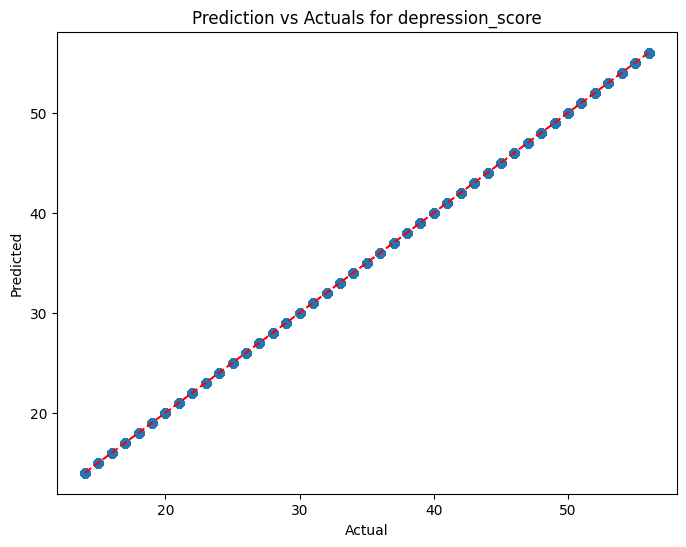

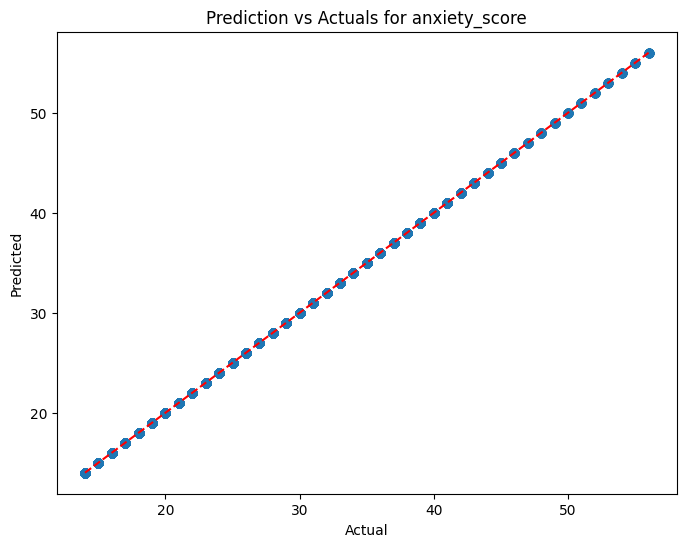

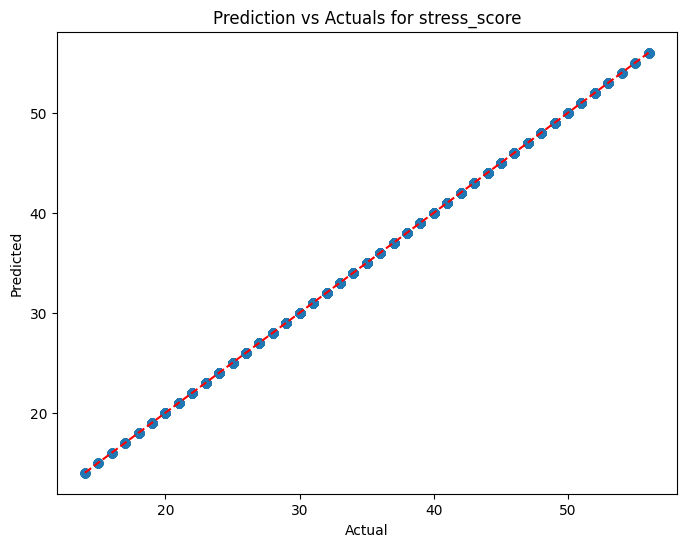

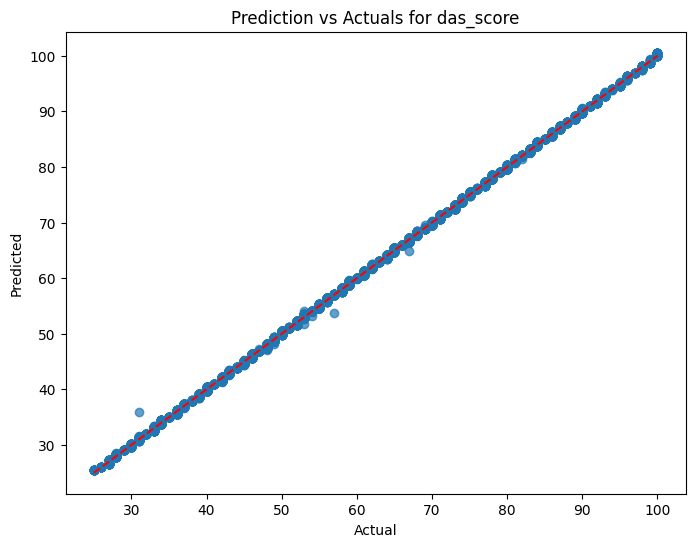

In [8]:
import matplotlib.pyplot as plt

# Plot: Prediction vs Actual
for i, target in enumerate(target_names):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test.iloc[:, i], y_pred[:, i], alpha=0.7)
    plt.plot(
        [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
        [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
        color="red",
        linestyle="--",
    )  # Line of perfect prediction
    plt.title(f"Prediction vs Actuals for {target}")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()


### Residual Plot

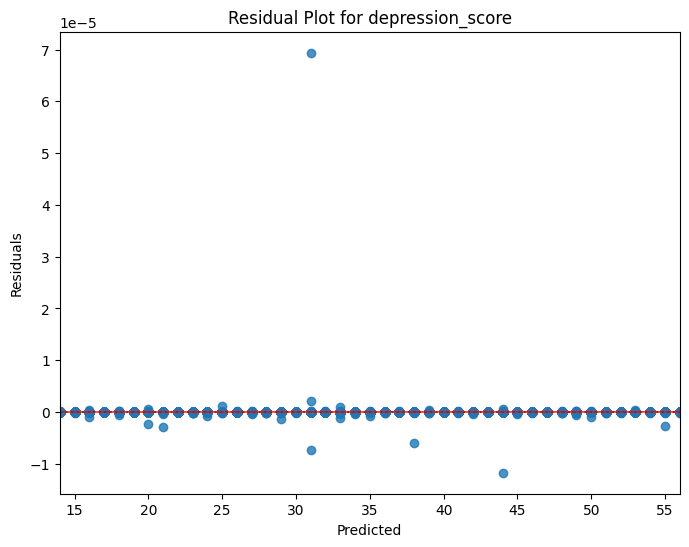

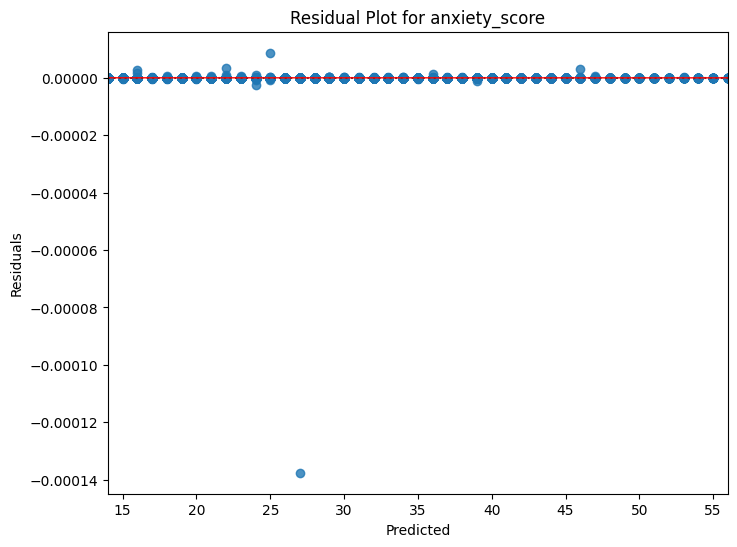

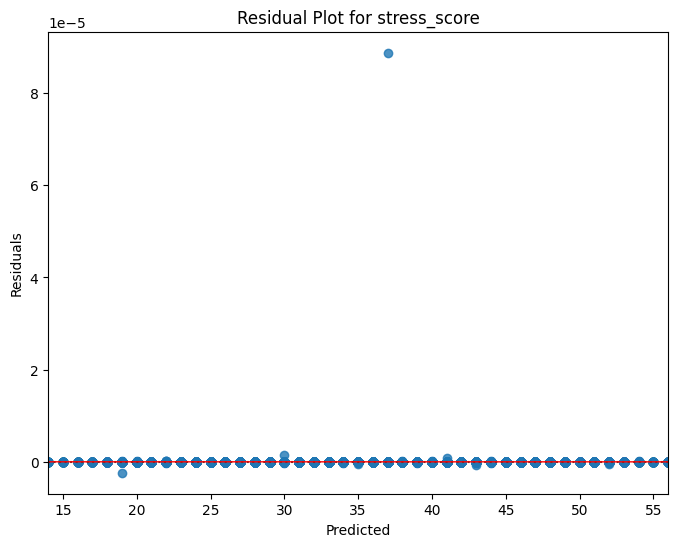

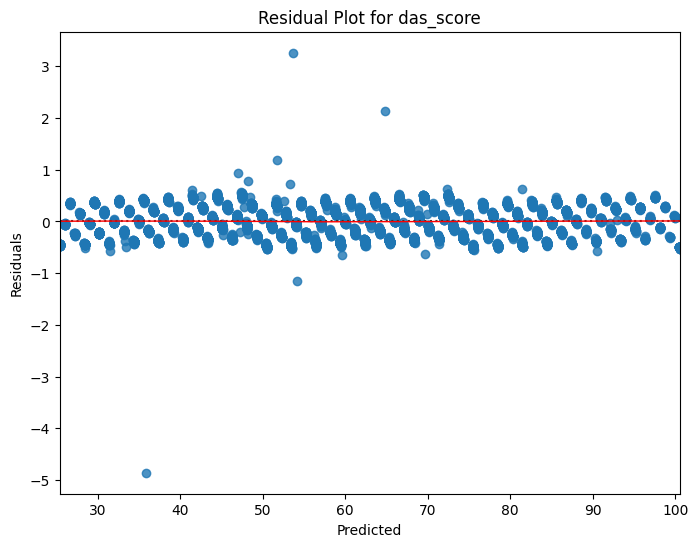

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Residual Plot
for i, target in enumerate(target_names):
    # Calculate residuals
    residuals = y_test.iloc[:, i] - y_pred[:, i]

    # Create a residual plot
    plt.figure(figsize=(8, 6))
    sns.residplot(
        x=y_pred[:, i], y=residuals, lowess=True, line_kws={"color": "red", "lw": 1}
    )
    plt.title(f"Residual Plot for {target}")
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    plt.show()


## Saving the model

In [10]:
import joblib
import os

# Create the models folder if it doesn't exist
os.makedirs("models", exist_ok=True)

# Save the trained model
joblib.dump(model, "models/svmv3.pkl")

# Save the feature column names used during training
joblib.dump(X.columns.tolist(), "models/svmv3_features.pkl")

print("✅ Model and features saved to the 'Models' folder.")


✅ Model and features saved to the 'Models' folder.
